In [1]:
import folium
import numpy as np
import pandas as pd
from osgeo import gdal
import os
import matplotlib
from matplotlib import cm
import branca.colormap as bcm

In [2]:
class InputTif:
    def __init__(self,in_file):
        self.in_file = in_file  # Tiff或者ENVI文件
        dataset = gdal.Open(self.in_file)
        self.XSize = dataset.RasterXSize  # 网格的X轴像素数量
        self.YSize = dataset.RasterYSize  # 网格的Y轴像素数量
        self.Bands = dataset.RasterCount  # 波段数
        self.GeoTransform = dataset.GetGeoTransform()  # 投影转换信息
        self.ProjectionInfo = dataset.GetProjection()  # 投影信息
        
    def get_data(self):
        dataset = gdal.Open(self.in_file)
        data = dataset.ReadAsArray(0,0,self.XSize,self.YSize)
        return np.array(data)
        
    def get_lonlat(self):
        dataset = gdal.Open(self.in_file)
        gtf = self.GeoTransform
        pro = self.ProjectionInfo
        x_range = range(0, self.XSize)
        y_range = range(0, self.YSize)
        x, y = np.meshgrid(x_range, y_range)
        lon = gtf[0] + x * gtf[1] + y * gtf[2]
        lat = gtf[3] + x * gtf[4] + y * gtf[5]
        return np.min(lon),np.max(lon),np.min(lat),np.max(lat)

In [3]:
input_file=r"D:\Desktop\GPP_C3_gdals3.tif"
MinLon,MaxLon,MinLat,MaxLat=InputTif(input_file).get_lonlat()
dataset=InputTif(input_file).get_data()

In [4]:
dataset.shape


(365, 630, 1439)

In [5]:
m = folium.Map(location=[39.93, 116.38],tiles="OpenStreetMap",zoom_start=8)
# fig=folium.Figure(width=500,height=300)
# fig.add_child(m)

In [6]:
cmap=bcm.linear.Set1_09.scale(0, 2).to_step(10)
cmap

In [7]:
linear = bcm.LinearColormap(["White","green", "yellow", "red"], vmin=0, vmax=2)

linear

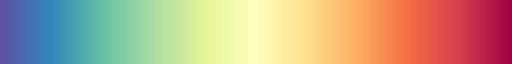

In [8]:
viridis_big = cm.get_cmap('Spectral_r')
viridis_big

In [9]:
cNorm = matplotlib.colors.Normalize(vmin=0, vmax=2)
viridis =cm.ScalarMappable(norm=cNorm, cmap='Spectral_r')
viridis

In [15]:
test=folium.LinearColormap(colors=["lightblue", "yellow", "red"])
test

In [12]:
dd=bcm.linear.Spectral_07.scale(0,2)
dd

In [22]:
# for i in range(8):
qq=dataset[180,:,:]
qq[np.isnan(qq)]=0
qq[qq>2]=2
qq[qq<0]=0
folium.raster_layers.ImageOverlay(image =qq,name="GPP"+str(180),
                                  bounds =[[MinLat,MinLon],[MaxLat,MaxLon]],
                                  mercator_project = True,
                                  colormap= lambda x : dd(x) 
#                                   colormap=viridis_big

                                  ).add_to(m)
# cmap.caption = "A colormap caption"
# m.add_child(linear)

folium.LayerControl().add_to(m)

IndexError: tuple index out of range

In [21]:
m
# m.save("image.html")

In [ ]:
ps=np.array([[[0,1,2,3],[1,2,3,4],[2,3,4,5]],
             [[3,4,5,6],[4,5,6,7],[5,6,7,8]],
             [[6,7,8,9],[7,8,9,10],[8,9,10,11]]])
ps.shape

In [ ]:
# for i in range(dataset.shape[1]):
#     for j in range(dataset.shape[2]):
#         da[i,j]=dataset[:,i,j]